# Business Problem

1. **Objective**
   - To classifiy an image into 3 categories: Driving License, Social Security Card, Other
   - Learn from images and its properties to classify into the respective categories better


2. **Machine Learning Problem**
   - Develop a machine learning model based on convolution neural network to learn properties of the 3 categories of images and predict accurately for new image


3. **Technology**
   - Python, Scikit-learn, tensorflow, keras, Numpy
   

4. **Decision making**
   - Select the best model which performs the best w.r.t classification accuracy
   - Metrics: Accuracy
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real time to classify images



**Dataset**<br>
driving_license images<br>
social_security images<br>
other images<br>

In [1]:
# !pip install numpy==1.21.5
# !pip install keras==2.7.0
# !pip install tensorflow==2.7.0
# !pip install matplotlib==3.5.1

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pathlib #helps to load bunch of images from a path
from tensorflow import keras
from tensorflow.keras import layers
import PIL # helps to do image processing things
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [4]:
data_dir = pathlib.Path("input/Training_data/")

In [5]:
from pathlib import Path

# Define the data directory
data_dir = Path("path/to/your/data")

# Count the images
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

0


In [6]:
driving_license = list(data_dir.glob('driving_license/*'))
social_security = list(data_dir.glob('social_security/*'))
others = list(data_dir.glob('others/*'))

In [22]:
print(len(driving_license))
print(len(social_security))
print(len(others))


0
0
0


In [23]:
import os

# Define the folders
driving_license_folder = "input/Training_data/Driving_License"
social_security_folder = "input/Training_data/Social_Security"
others_folder = "input/Training_data/Others"

# Empty lists to store file paths
driving_license = []
social_security = []
others = []

# Load images into the lists
for filename in os.listdir(driving_license_folder):
    driving_license.append(os.path.join(driving_license_folder, filename))

for filename in os.listdir(social_security_folder):
    social_security.append(os.path.join(social_security_folder, filename))

for filename in os.listdir(others_folder):
    others.append(os.path.join(others_folder, filename))


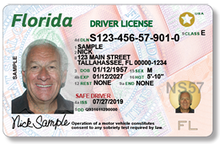

In [24]:
PIL.Image.open(driving_license[0])


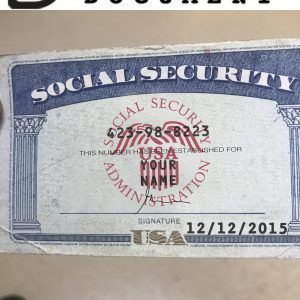

In [25]:
PIL.Image.open(str(social_security[10]))

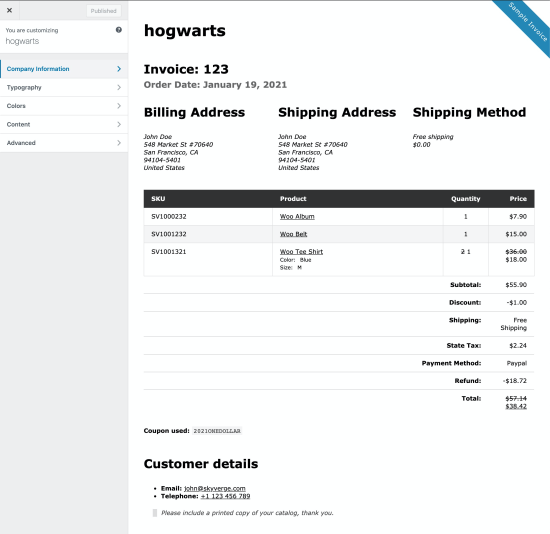

In [26]:
PIL.Image.open(str(others[140]))

In [27]:
batch_size = 32 #32 image batches
img_height = 180
img_width = 180

In [29]:
data_dir = "C:/datasets/my_images"


In [32]:
data_dir = "input/Training_data"

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 480 files for training.
Using 480 files for training.


In [33]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 120 files for validation.
Using 120 files for validation.


In [34]:
class_names = train_ds.class_names
print(class_names)

['driving_license', 'others', 'social_security']


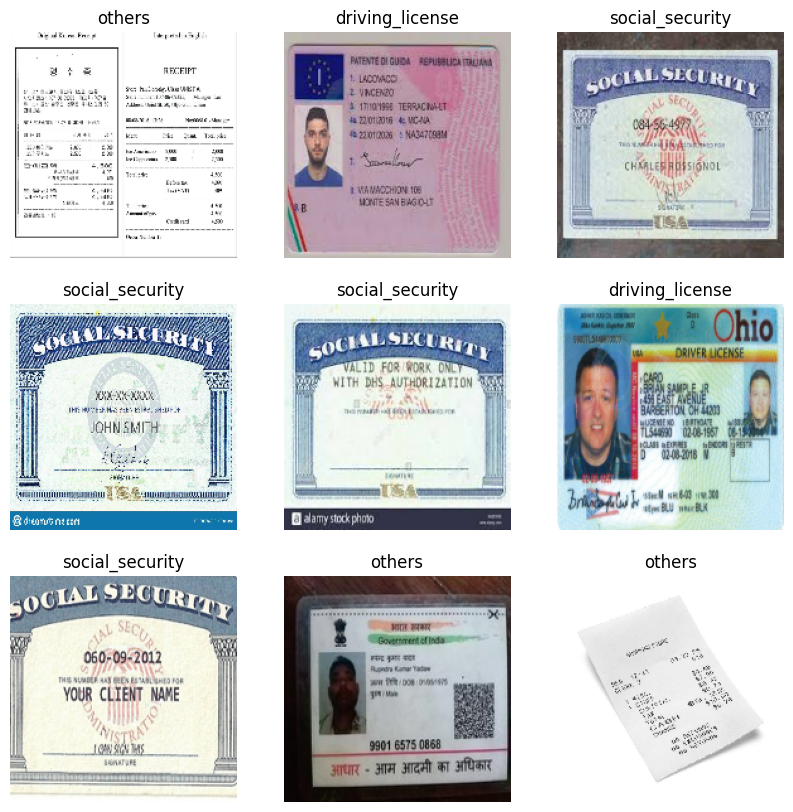

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [36]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)  #(batch, image height & width, image categories)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [37]:
AUTOTUNE = tf.data.AUTOTUNE 
# if  model is executing a step s, it'll fetch image for s+1
# caches images
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
normalization_layer = layers.Rescaling(1./255) #normalizing images

In [39]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.02023985 0.77623665


In [40]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\harshith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.3403 - loss: 2.3412 - val_accuracy: 0.4000 - val_loss: 1.0798
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.3403 - loss: 2.3412 - val_accuracy: 0.4000 - val_loss: 1.0798
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.5654 - loss: 1.0030 - val_accuracy: 0.7167 - val_loss: 0.7051
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.5654 - loss: 1.0030 - val_accuracy: 0.7167 - val_loss: 0.7051
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.8225 - loss: 0.5845 - val_accuracy: 0.8583 - val_loss: 0.4210
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.8225 - loss: 0.5845 - val_accuracy: 0.8583 - val_loss: 0.4210
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.8669 - loss: 0.3758 - val_accuracy: 0.8667 - val_loss: 0.3685
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.8669 - loss: 0.3758 - val_accuracy: 0.

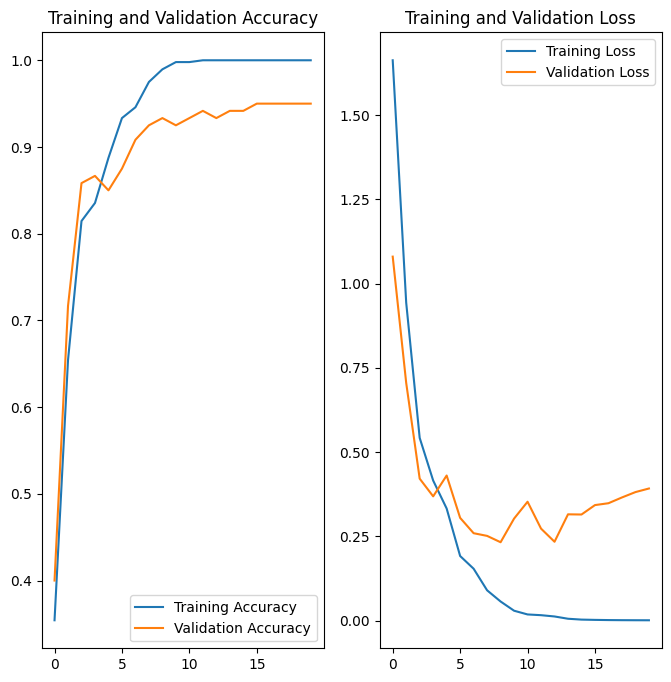

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation using Keras

In [45]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

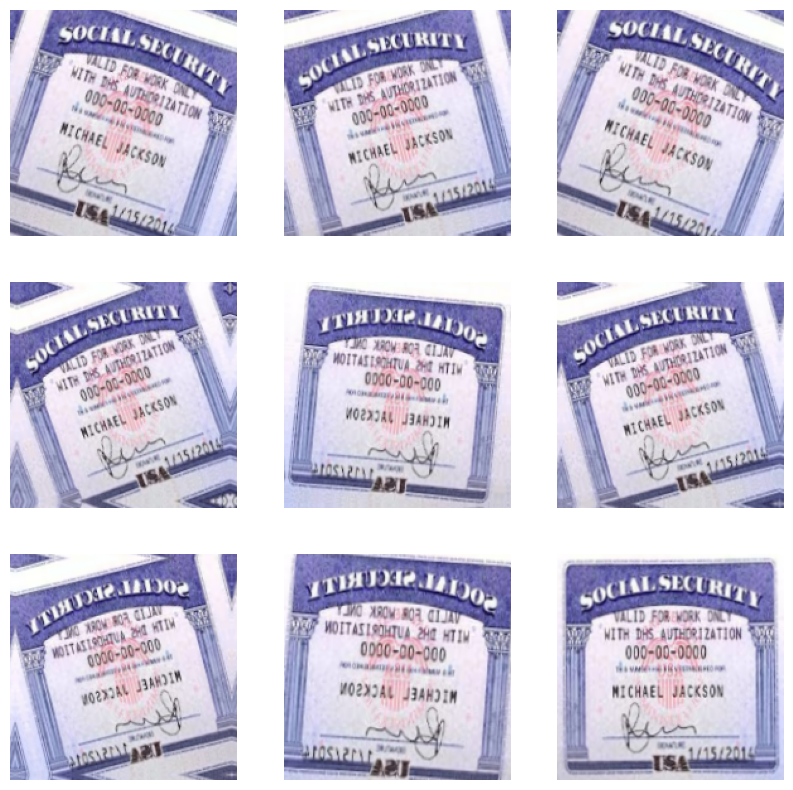

In [46]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

#### Implementing Dropout

In [47]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.3188 - loss: 2.2253 - val_accuracy: 0.3833 - val_loss: 1.1004
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.3188 - loss: 2.2253 - val_accuracy: 0.3833 - val_loss: 1.1004
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.3802 - loss: 1.0967 - val_accuracy: 0.3333 - val_loss: 1.0710
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.3802 - loss: 1.0967 - val_accuracy: 0.3333 - val_loss: 1.0710
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.4140 - loss: 1.0516 - val_accuracy: 0.4667 - val_loss: 0.9703
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.4140 - loss: 1.0516 - val_accuracy: 0.4667 - val_loss: 0.9703
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.5894 - loss: 0.9412 - val_accuracy: 0.5667 - val_loss: 0.8928
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.5894 - loss: 0.9412 - val_accuracy: 0.

In [51]:
model.save("cnn-model.h5") #saving the model

In [52]:
model = tf.keras.models.load_model("cnn-model.h5")

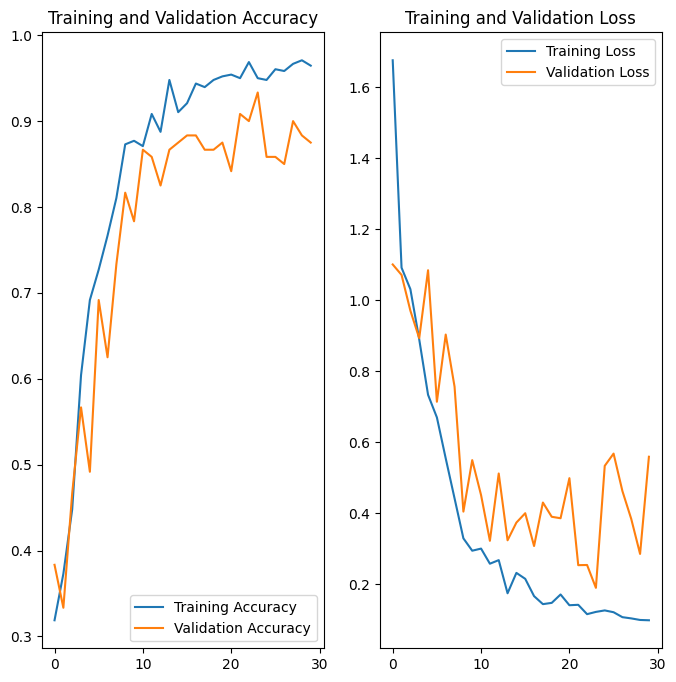

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#after 10 epochs loss was minimum validation loss increased after 10 epochs..
#therefore can train upto 10 epochs

## Prediction

In [54]:
test_data_dir = pathlib.Path("input/Testing_Data//")

In [55]:
image_count = len(list(test_data_dir.glob('*/*')))
print(image_count)

150


In [56]:
test_driving_license = list(test_data_dir.glob('driving_license/*'))
test_social_security = list(test_data_dir.glob('social_security/*'))
test_others = list(test_data_dir.glob('others/*'))

In [57]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 150 files belonging to 3 classes.


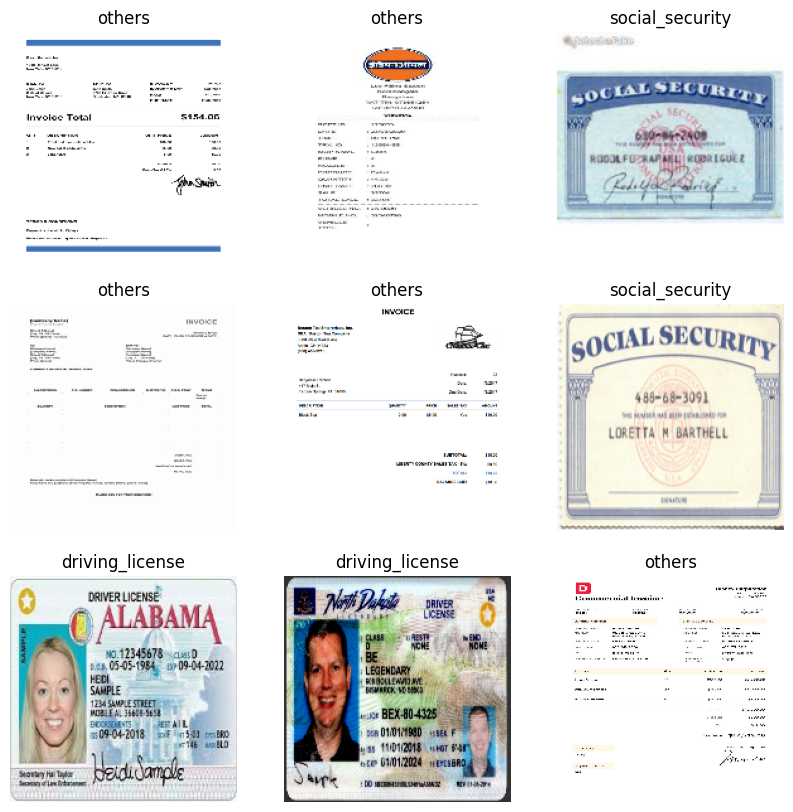

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [59]:
model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7854 - loss: 0.9601


[0.8221107721328735, 0.8133333325386047]

In [60]:
img = tf.keras.utils.load_img(
    "input/Testing_Data/others/111.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [61]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
This image most likely belongs to others with a 99.38 percent confidence.
